In [28]:
#Step 1:Import Primary Modules:
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl
import matplotlib.pyplot as plt

# Step2:use the inline backend to generate the plots within the browser
%matplotlib inline

# optional: for ggplot-like style
mpl.style.use('ggplot')

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.3


In [2]:
#Step 3: Fetching data
df_canada= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
#Step 4: first five items in our dataset.
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
#Step 5: Let's find out how many entries there are in our dataset(dimensions of the dataframe)
print(df_canada.shape)

(195, 39)


In [5]:
#Step 6: Find Column names
df_canada.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [6]:
#Step 7:Inspecting Dataset Structure and Metadata
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [7]:
#Step 8: Set the country name as index - useful for quickly looking up countries using .loc method.
df_canada.set_index('Country',inplace=True)
df_canada.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [8]:
#Step 9: Notice now the country names now serve as indices.
print(df_canada.shape)

(195, 38)


In [9]:
#Step 10: # finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years=list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [10]:
#Step11: Use the scripting layer to create a stacked area plot of the 5 countries 
#that contributed the least to immigration to Canada 
#from 1980 to 2013. Use a transparency value of 0.45.

#11.1:  get the 5 countries with the least contribution.
df_least5=df_canada.tail()
df_least5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677
Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,...,615,454,663,611,508,494,434,437,407,8598


In [11]:
#11.2: Transpose the dataframe.
df_least5=df_least5[years].transpose()
df_least5.head()

Country,Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980,1191,0,1,11,72
1981,1829,0,2,17,114
1982,2162,0,1,11,102
1983,3404,0,6,7,44
1984,7583,0,0,16,32


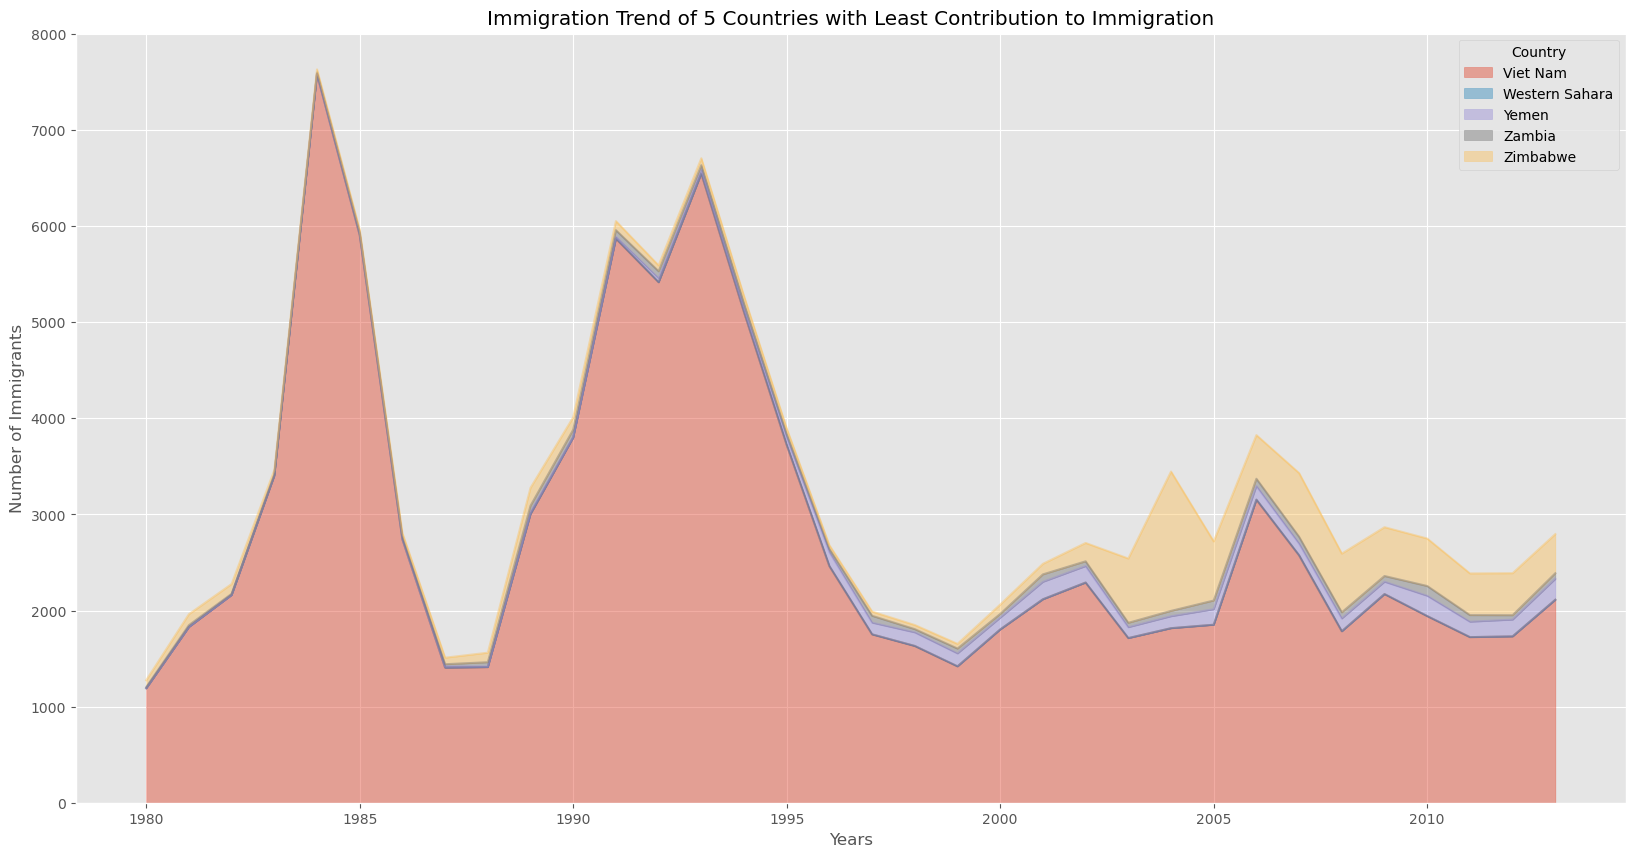

In [24]:
#Note: Pandas automatically converts column names (integers) into index labels (strings) 
#when transposing.
#11.3:  let's change the index values of df_least5 to type integer for plotting.

df_least5.index=df_least5.index.map(int)

#*********.  Area plot.   ******

#11.4: Creating an area plot df_least5 plot(kind='area', stacked=False, alpha=0.45,figsize=(20,10))
df_least5.plot(kind='area',  
               alpha=0.45, 
               figsize=(20,10))

#11.5: Adding chart labels and title
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


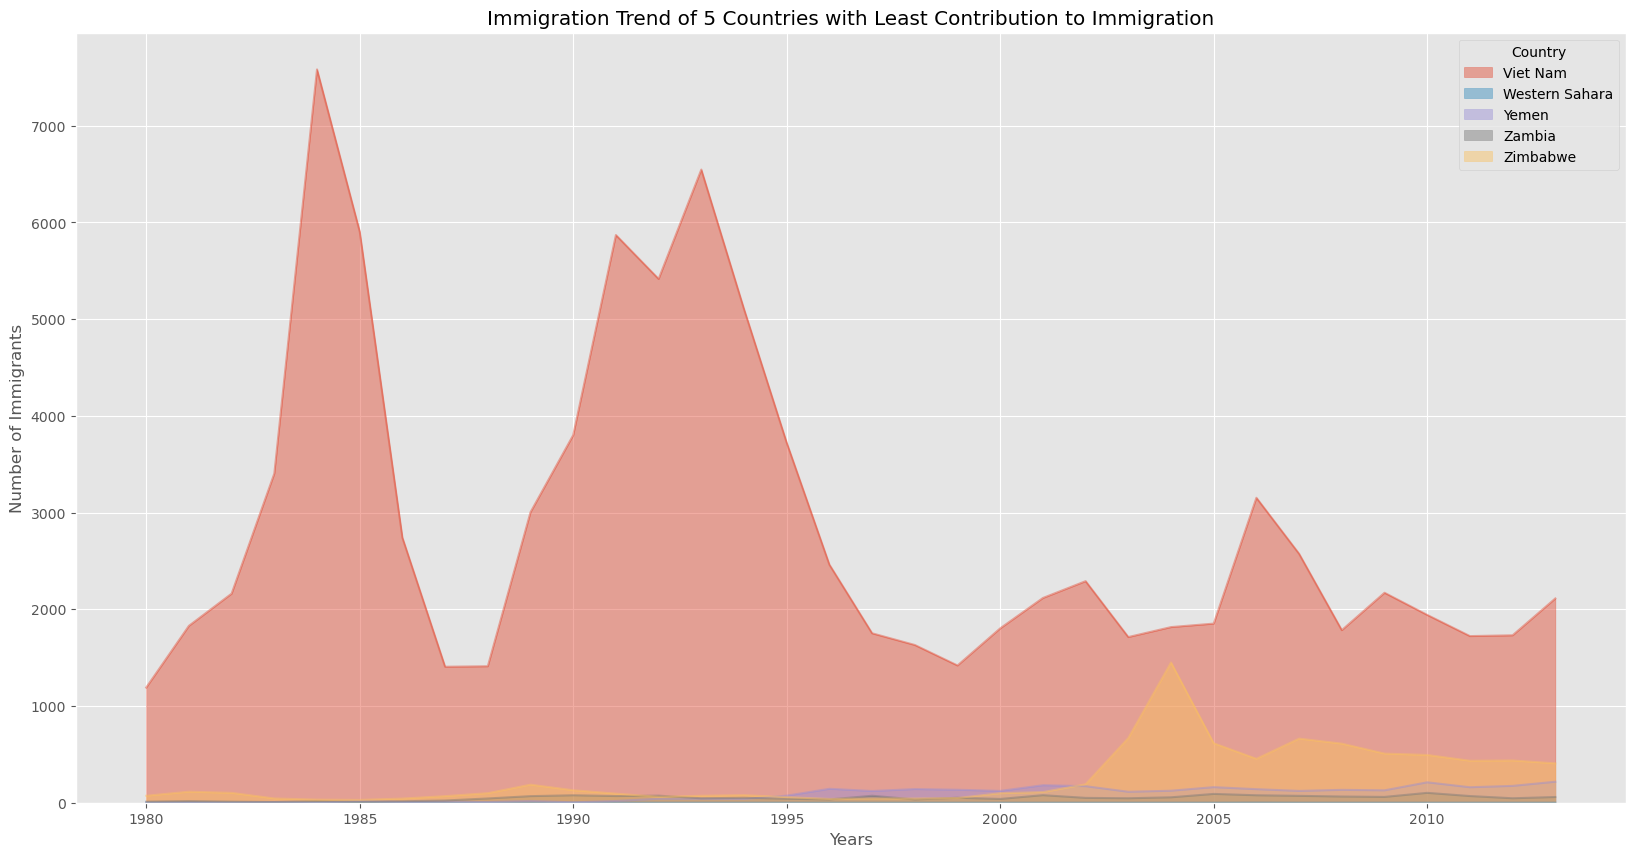

In [13]:
#Step 12:  Use the artist layer to create an unstacked area plot of the 5 countries
#that contributed the least to immigration to Canada
#**from** 1980 to 2013. Use a transparency value of 0.55.

df_least5.index=df_least5.index.map(int)

#12.4: Creating an area plot df_least5 plot(kind='area', stacked=False, alpha=0.55,figsize=(20,10))
df_least5.plot(kind='area',
               stacked=False,
               alpha=0.45,
               figsize=(20,10))

#12.5: Adding chart labels and title
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [14]:
#*******   Histogram    **********
#Step 13: What is the frequency distribution of the number (population)
#of new immigrants from the various countries to Canada in 2013?

#Note: Before we proceed with creating the histogram plot, let's first examine 
#the data split into intervals. To do this, we will us **Numpy**'s `histrogram` 
#method to get the bin ranges and frequency counts as follows:

#!13.1:  let's quickly view the 2013 data
df_canada['2013'].head()

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
Name: 2013, dtype: int64

In [15]:
#13.2: Getting Counts and Bin Edges for 2013 Immigration Data(np.histogram returns 2 values).
count, bin_edges=np.histogram(df_canada['2013'])

#13.3: 
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins



[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


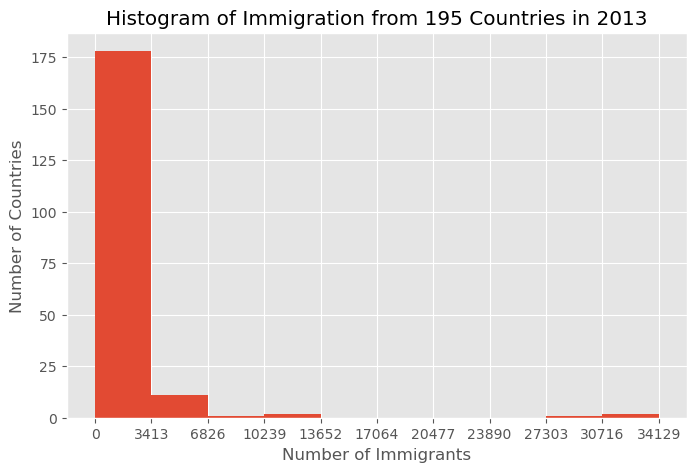

In [16]:
#13.4: Histogram of Immigration Distribution Across 195 Countries in 2013”
df_canada['2013'].plot(kind='hist',figsize=(8,5),xticks=bin_edges )
# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In [17]:
#14: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
#14.1: # let's quickly view the dataset 
df_canada.loc[['Denmark','Norway','Sweden'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [18]:
#14.2: # transpose dataframe
df_DNS=df_canada.loc[['Denmark','Norway','Sweden'],years].transpose()
df_DNS.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


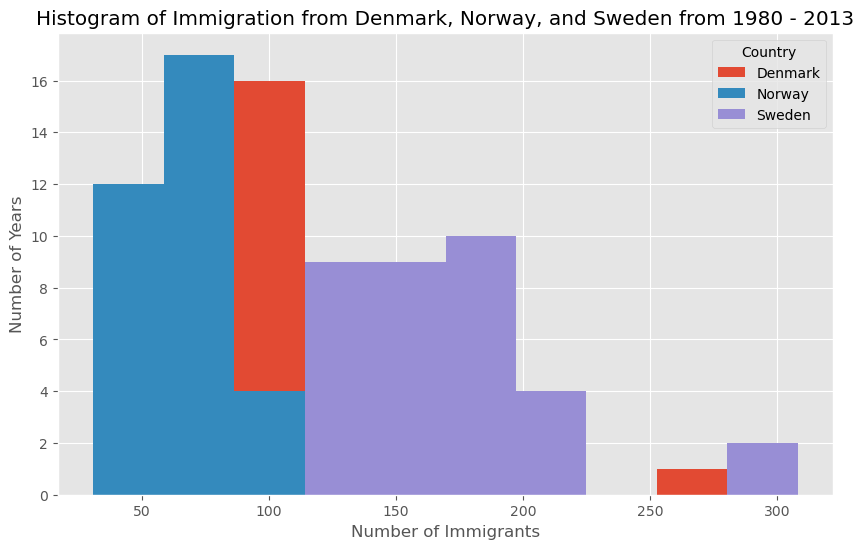

In [19]:
#14.3:# generate histogram
df_DNS.plot(kind='hist',figsize=(10,6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [20]:
#14.3:#  histogram with
# 1.increase the bin size to 15 by passing in bins parameter;
# 2.set transparency to 60% by passing in alpha parameter;
# 3.label the x-axis by passing in x-label parameter;
# 4. change the colors of the plots by passing in color parameter.

# 14.3.1: let's get the x-tick values
count,bin_edge=np.histogram(df_DNS,15)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins


[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


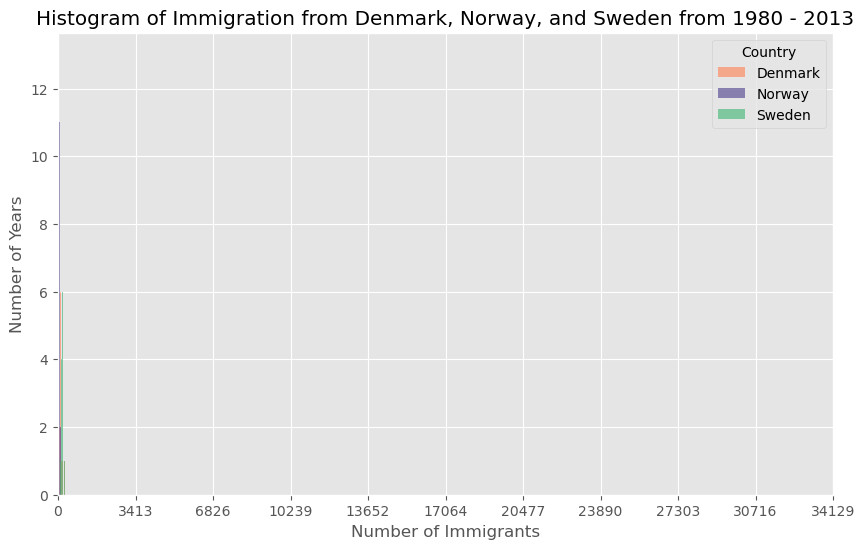

In [21]:
#14.3.2: Generate Histogram

df_DNS.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          stacked=False,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
          
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

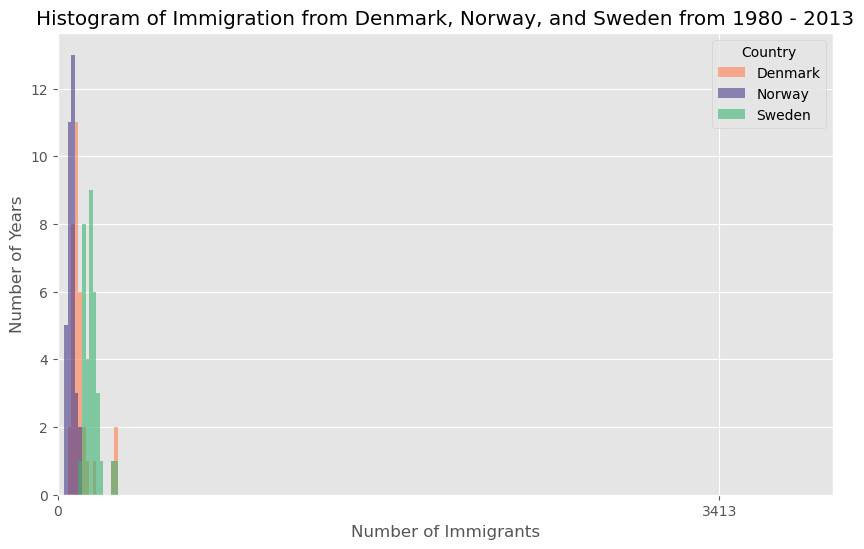

In [22]:
#14.3.3: zoom in on the range
df_DNS.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          stacked=False,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )
plt.xlim(0,4000)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [23]:
#******* Bar chart  ********
#15: Let's compare the number of Icelandic immigrants (country = 'Iceland') 
#to Canada from year 1980 to 2013.

#15.1: get the data
df_iceland=df_canada.loc['Iceland',years]
df_iceland.head()



1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

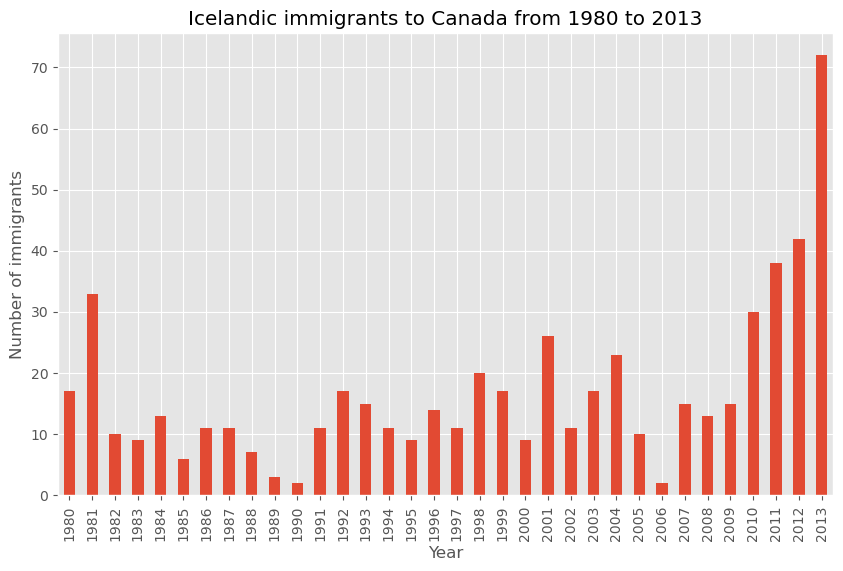

In [25]:
#15.2: Bar Chart of Icelandic Immigration to Canada (1980–2013)”
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

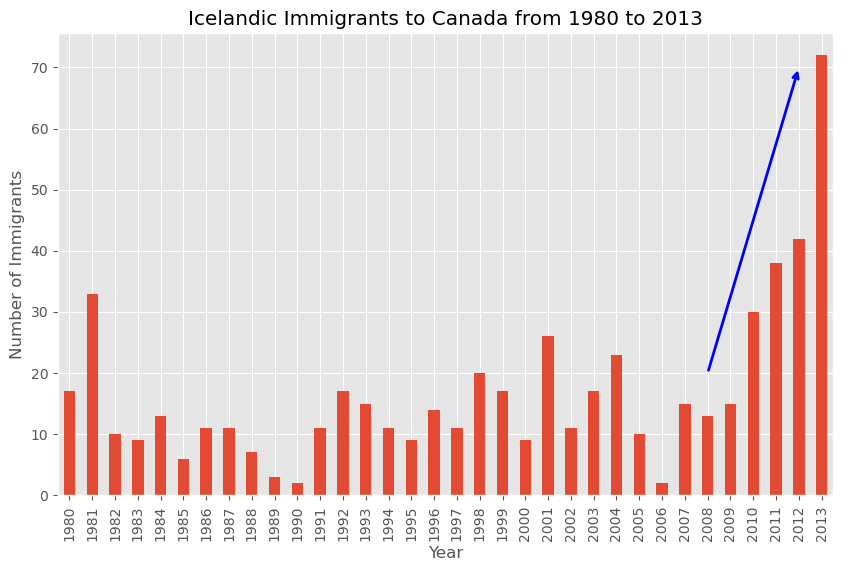

In [34]:
#15.3: Annotated (Arrow)Bar Chart of Icelandic Immigration to Canada (1980–2013)
#15.3.1: Bar Chart of Icelandic Immigration with Rotated Year Labels.
df_iceland.plot(kind='bar',figsize=(10,6), rot=90)

#15.3.2: Adding labels and title.
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

#15.3.3: Annotated Bar Chart- Highlighting Immigration Spike
# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
plt.show()


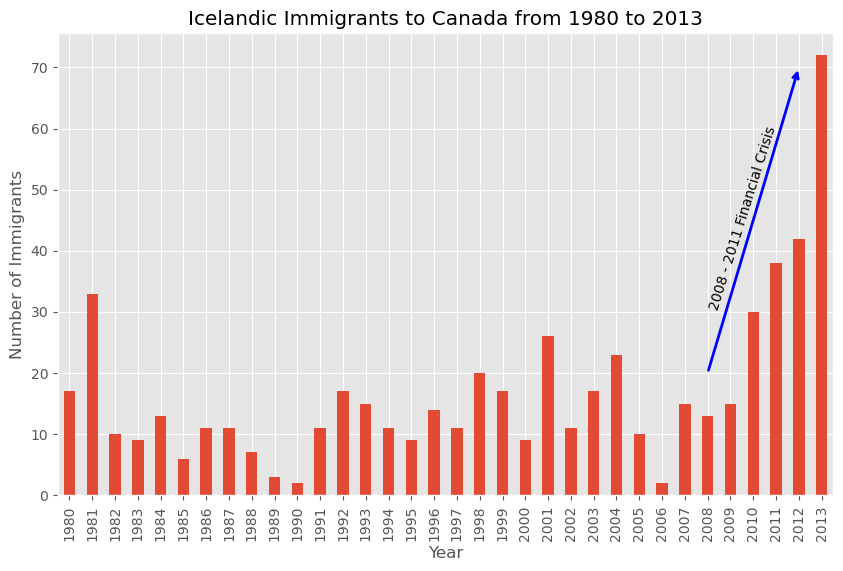

In [35]:
#15.3.4:Annotated (Arrow with Text)Bar Chart of Icelandic Immigration Highlighting 2008–2011 
#Financial Crisis.
#15.3: Annotated (Arrow)Bar Chart of Icelandic Immigration to Canada (1980–2013)
#15.3.1: Bar Chart of Icelandic Immigration with Rotated Year Labels.
df_iceland.plot(kind='bar',figsize=(10,6), rot=90)

#15.3.2: Adding labels and title.
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

#15.3.3: Annotated Bar Chart- Highlighting Immigration Spike
# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()


In [39]:
#16:create a *horizontal* bar plot showing the *total* number of immigrants to Canada
#from the top 15 countries, for the period 1980 - 2013. Label each country
#with the total immigrant count.

#16.1: # sort dataframe on 'Total' column (descending)
df_canada.sort_values(by='Total',ascending=True,inplace=True)

#16.2: # get top 15 countries
df_top15=df_canada['Total'].tail(15)
df_top15.head(3)


Country
Romania      93585
Viet Nam     97146
Jamaica     106431
Name: Total, dtype: int64

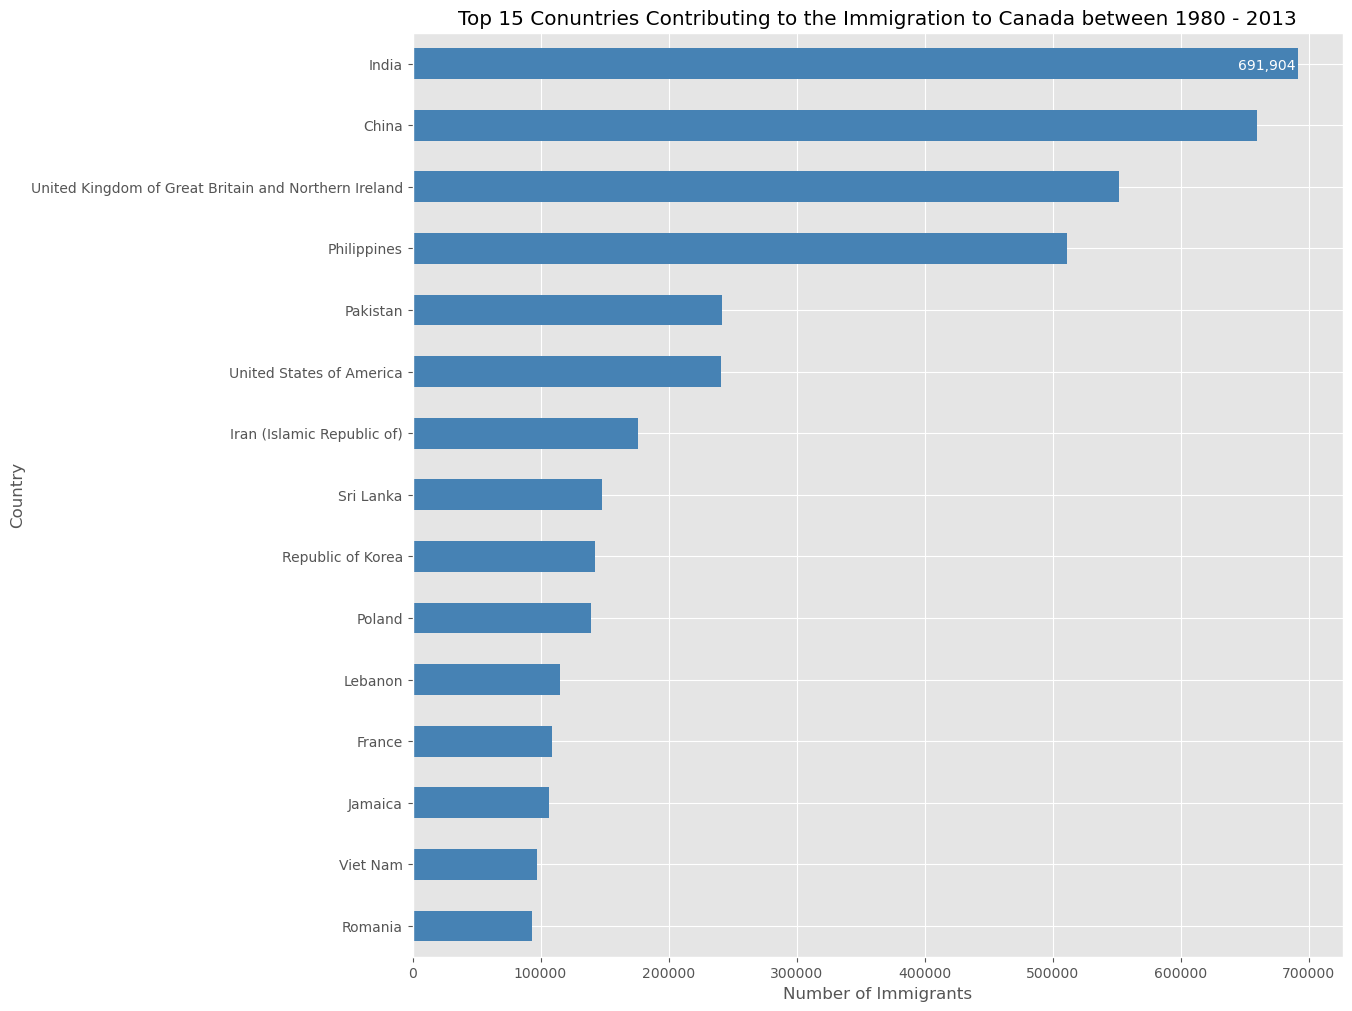

In [43]:
# 16.3:generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
 label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()
